In [4]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
words = open('names.txt', 'r').read().splitlines()
print(words[:3])

['emma', 'olivia', 'ava']


## seperate the name into bigrams

### Goal:
we wanna make a matrix of `27*27` where the value is the count that letter (of the column) follows the letter (in the row)

In [6]:
# char to integer mapping
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0 
stoi

# integer to char mapping
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [7]:
bigrams = torch.zeros((27, 27), dtype=torch.int32)

for word in words:
    word = "." + word + "."
    for ch1, ch2 in zip(word, word[1:]):
        i = stoi[ch1]
        j = stoi[ch2]
        bigrams[i, j] += 1


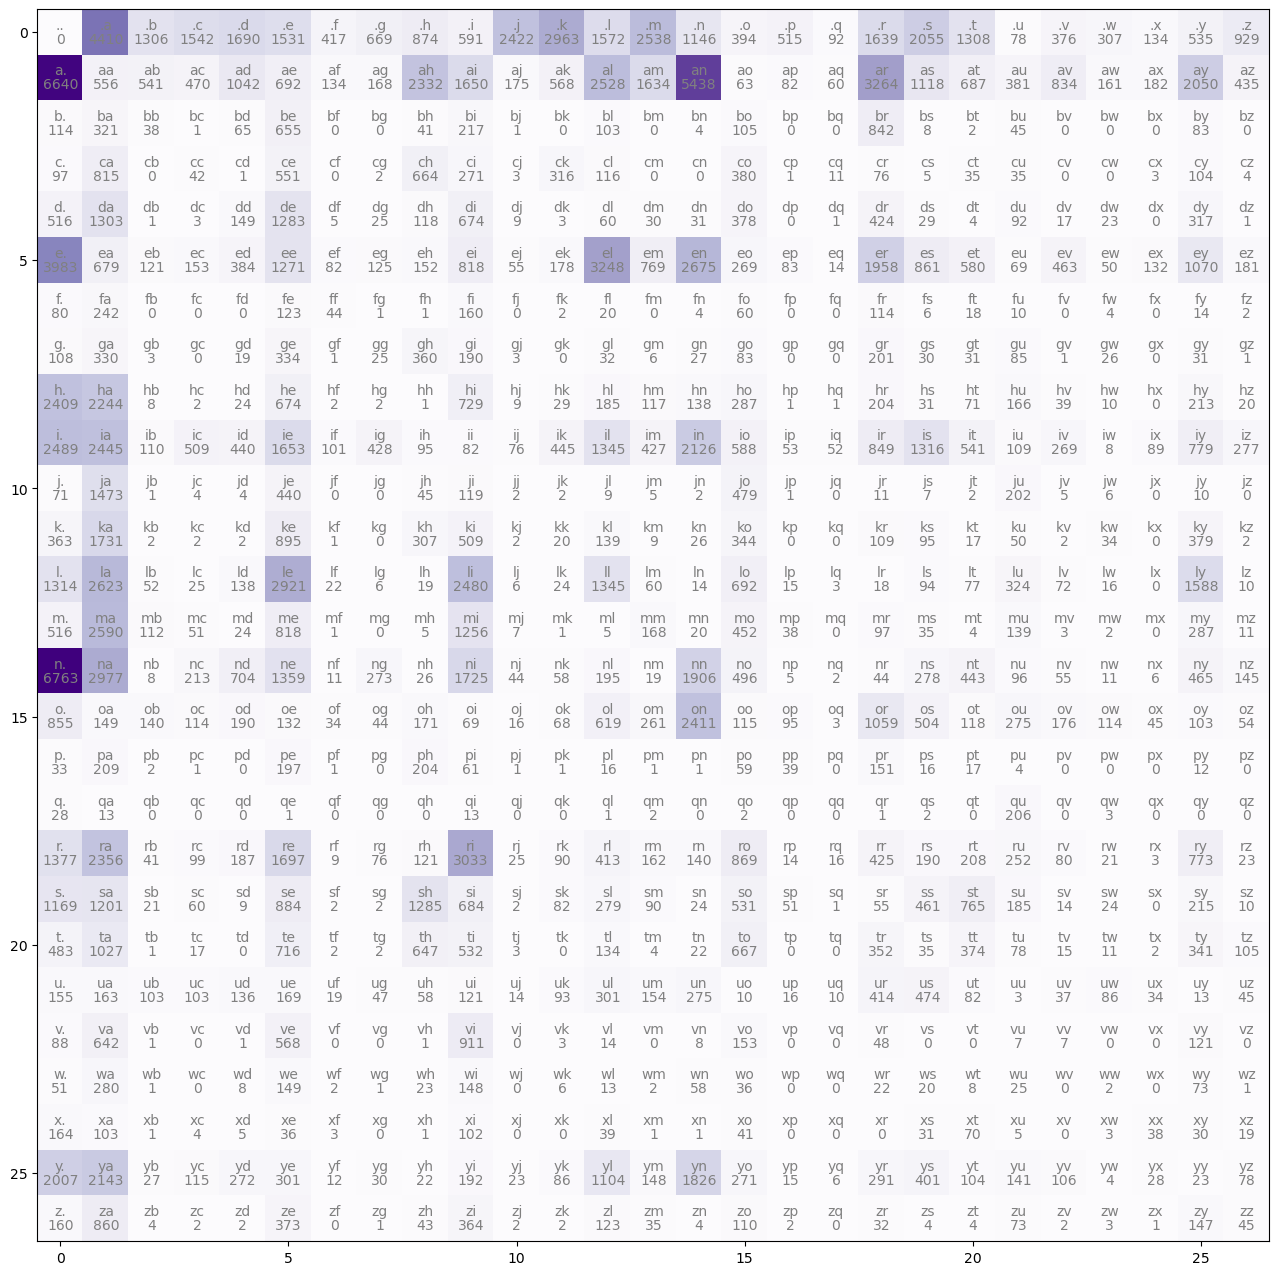

In [8]:
plt.figure(figsize=(16,16))
plt.imshow(bigrams, cmap='Purples')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, bigrams[i, j].item(), ha="center", va="top", color='gray')
plt.show()

### Compute probalities
1. get the probability ditr. for the training bigrams
   1. get the probability distr. of each row

2. choose a letter randomly
3. given that this letter was chosen, choose the letter with the highest prob to follow the first one

In [29]:
#27 27
#27 1
p = (bigrams) / bigrams.sum(dim=1, keepdim=True)
p[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [30]:
g = torch.Generator().manual_seed(2147483647)

names = []
for _ in range(10):
    name = ""
    ix = 0
    while True:
        ix = torch.multinomial(p[ix], num_samples=1, generator=g, replacement=True).item()
        ch = itos[ix]
        name += ch
        if ch == ".": break
    names.append(name)

names

['cexze.',
 'momasurailezitynn.',
 'konimittain.',
 'llayn.',
 'ka.',
 'da.',
 'staiyaubrtthrigotai.',
 'moliellavo.',
 'ke.',
 'teda.']

### compute the loss of our model

In [38]:
loss = 0.0
for word in words:
    word = "." + word + "."
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # the probablity that the model assigns to the real bigrams
        loss -= torch.log(p[ix1, ix2])
        print(f"{ch1}{ch2}: {p[ix1][ix2]:.4f}")

loss

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960
.i: 0.0184
is: 0.0743
sa: 0.1482
ab: 0.0160
be: 0.2476
el: 0.1590
ll: 0.0964
la: 0.1879
a.: 0.1960
.s: 0.0642
so: 0.0655
op: 0.0120
ph: 0.1988
hi: 0.0957
ia: 0.1381
a.: 0.1960
.c: 0.0481
ch: 0.1880
ha: 0.2946
ar: 0.0963
rl: 0.0325
lo: 0.0496
ot: 0.0149
tt: 0.0671
te: 0.1285
e.: 0.1950
.m: 0.0792
mi: 0.1891
ia: 0.1381
a.: 0.1960
.a: 0.1377
am: 0.0482
me: 0.1232
el: 0.1590
li: 0.1777
ia: 0.1381
a.: 0.1960
.h: 0.0273
ha: 0.2946
ar: 0.0963
rp: 0.0011
pe: 0.1920
er: 0.0959
r.: 0.1084
.e: 0.0478
ev: 0.0227
ve: 0.2208
el: 0.1590
ly: 0.1138
yn: 0.1868
n.: 0.3690
.a: 0.1377
ab: 0.0160
bi: 0.0820
ig: 0.0242
ga: 0.1713
ai: 0.0487
il: 0.0760
l.: 0.0941
.e: 0.0478
em: 0.0377
mi: 0.1891
il: 0.0760
ly: 0.1138
y.: 0.2053
.e: 0.0478
el: 0.1590
li: 0.1777
iz: 0.0156
za: 0.3586
ab: 0.0160
be: 0.2476
et: 0.0284
th: 0.1162
h.: 0.3163

tensor(559891.7500)